## Intuition

Imagine how you play a game. You have two distinct ways of thinking:

1. **System 1** (Fast, Intuitive) <br>
You look at a face and instantly recognize it. In AlphaZero, this is the **Neural Network**. It looks at the board and instantly feels: *"Move here"* or *"I'm winning"*. It's fast, creative, but sometimes wrong.

2. **System 2** (Slow, Deliberate) <br>
You solve a math problem or calculate chess strategies, thinking step-by-step. You might say:*"If I go there, he goes there..."* In AlphaZero, this is **Monte Carlo Tree Search (MCTS)**. It simulates the future to verify if the intuition is correct.


Traditional engines (like Stockfish) rely on massive calculation (System 2).<br>
Traditional NN relies on pattern matching (System 1).<br>
AlphaZero combines them:
*   The **Network** guides the Search, telling it where to look.
*   The **Search** improves the Network, generating data to correct its blind spots.

<br><br>

By designing a system that can play against itself, and then use the data generated from the self-play games to improve the network, which in turn improves the search, AlphaZero's method create a feedback loop that leads to superhuman performance from a blank slate.

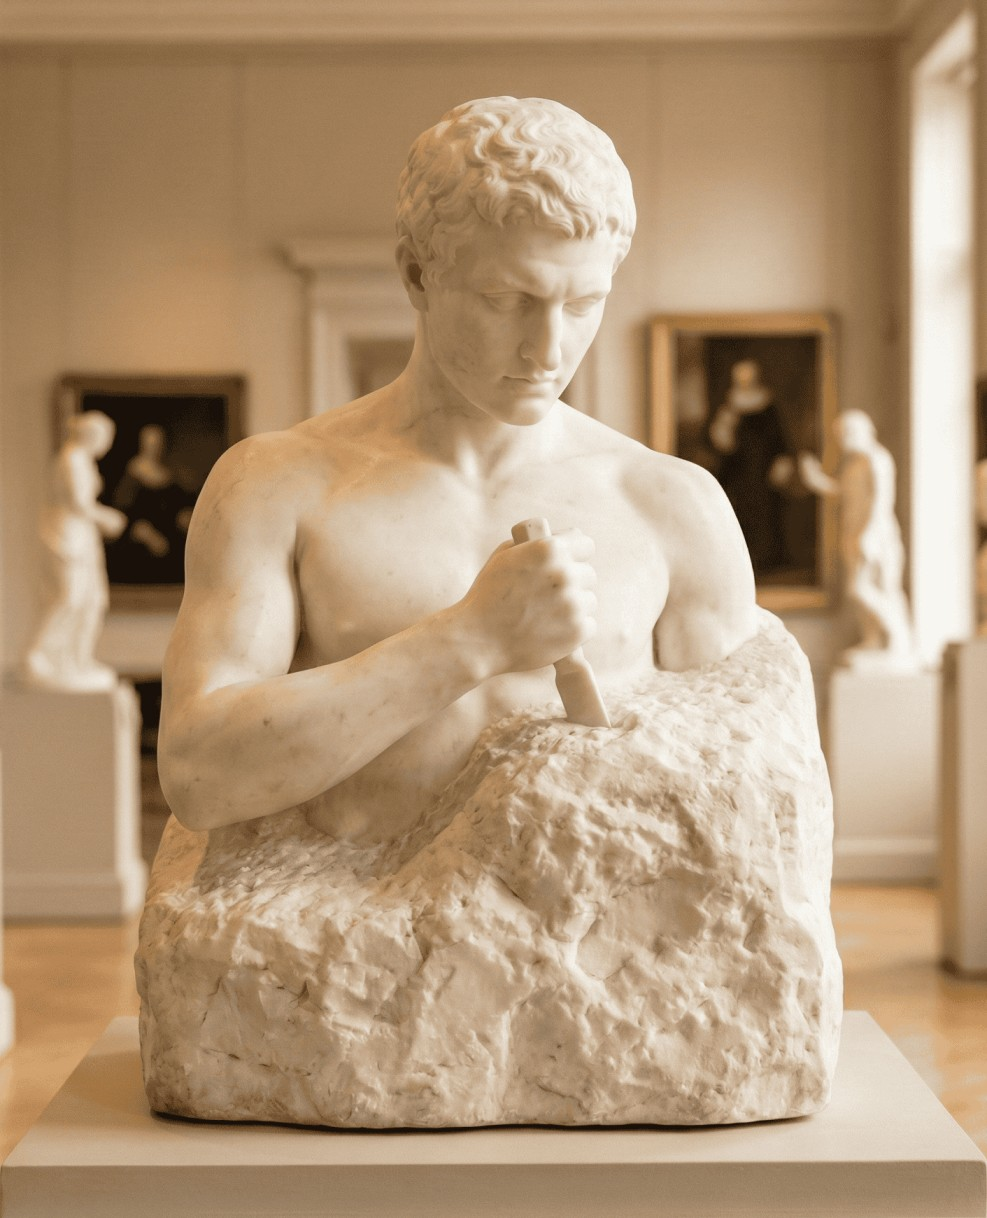

## Compass and Map

Imagine you're lost in a vast, foggy forest with no landmarks. To find your way, you have:
1. A **Compass** (the Network) that gives a rough sense of direction—fast and intuitive, but initially unreliable.
2. A **Map** (the Search) that you sketch as you explore, showing paths you've tried and their outcomes.

**The Paradox:** You need the compass to decide which way to go, but you need to have walked some paths to know how to adjust the compass.

**The Bootstrapping Loop:**
1. Self-Play - Even a random search outperforms a raw guess by looking a few moves ahead. The agent plays thousands of games against itself, generating training data.

2. Training - Those games teach the network which positions are promising and which moves lead to wins.

3. Improvement - A slightly smarter network now guides the search more effectively, exploring better branches of the game tree.

4. Repeat - Each cycle compounds the gains. The agent bootstraps its way from random play to superhuman performance.

## Learning Path

To learn more, explore these topics, each is notebook that introduces and explains the three core components of AlphaZero:

1. [**αMCTS**](mcts.html)
2. [**Neural Network**](nn.html)
3. [**Self-Play**](self-play.html)

In [8]:
html_str = """
<style>
/* ===== CSS Variables ===== */
:root {
  --bg: #FFFFFF;
  --panel: #FBFBFB;
  --text: #1D1D20;
  --muted: #6e7781;
  --accent: #0969da;
  --accent-lite: rgba(9, 105, 218, 0.08);
  --accent-shadow: rgba(9, 105, 218, 0.15);
  --border: #d0d7de;
  --grid: #d8dee4;
  --hero-bg-overlay: rgba(255, 255, 255, 0.5);
  --start-overlay-bg: rgba(255, 255, 255, 0.7);
  --game-over-bg: rgba(0, 0, 0, 0.7);
  --spinner-bg: #f3f3f3;
  --spinner-accent: #3498db;
  --canvas-bg: #fff;
  --button-secondary-bg: #f6f8fa;
  --table-header-bg: #f0f3f6;
  --qubic-btn-bg: #000;
  --qubic-btn-text: #fff;
  --qubic-btn-hover: #333;
  --tooltip-bg: white;
}

@media (prefers-color-scheme: dark) {
  :root {
    --bg: #1a1a1a;
    --panel: #2d2d2d;
    --text: #e0e0e0;
    --muted: #a0a0a0;
    --accent: #0969da;
    --accent-lite: rgba(9, 105, 218, 0.12);
    --accent-shadow: rgba(74, 158, 255, 0.15);
    --border: #404040;
    --grid: #404040;
    --hero-bg-overlay: rgba(0, 0, 0, 0.05);
    --start-overlay-bg: #1a1a1aee;
    --game-over-bg: rgba(255, 255, 255, 0.1);
    --spinner-bg: #404040;
    --spinner-accent: #4a9eff;
    --canvas-bg: #2d2d2d;
    --button-secondary-bg: #404040;
    --ai-status-bg: #4a9eff22;
    --table-header-bg: #333333;
    --qubic-btn-bg: #e0e0e0;
    --qubic-btn-text: #000;
    --qubic-btn-hover: #cccccc;
    --tooltip-bg: #2d2d2d;
  }
}

.section-content h2 {
  font-size: 3rem;
  font-weight: 500;
  margin: 80px 0 80px 0;
  color: var(--text);
}

.info-cards {
  display: flex;
  flex-direction: column;
  gap: 0;
  max-width: 1400px;
  margin: 0 auto;
}

.info-card {
  display: flex;
  flex-direction: row;
  align-items: center;
  gap: 24px;
  padding-left: 32px;
  padding-right: 32px;
  margin-top: 12px;
  border-radius: 0;
  border: 2px solid transparent;
  box-shadow: 0 2px 4px var(--accent-shadow);
}

.info-card:hover {
  background: var(--accent-lite);
  cursor: pointer;
}

.info-card-link {
  text-decoration: none;
  color: inherit;
  display: block;
}

.card-content {
  flex: 1;
  background: transparent;
  padding-left: 24px;
  margin-right: 124px;
  text-align: left;
}

.info-card:hover .card-content h3 {
  color: var(--accent);
  transition: color 0.4s;
}

.card-image {
  flex: 0 0 auto;
  width: 350px;
  height: 350px;
  display: flex;
  align-items: center;
  justify-content: center;
  padding: 20px;
  font-size: 2rem;
  color: var(--accent);
}

.card-image svg,
.card-image img {
  width: 100%;
  height: 100%;
  max-width: 100%;
  max-height: 100%;
  object-fit: contain;
}

.info-card h3 {
  font-size: 2.5rem;
  font-weight: 500;
  margin: 0 0 24px 0;
  color: var(--text);
}

.info-card p {
  color: var(--muted);
  line-height: 1.8;
  font-size: 1.35rem;
  margin: 0;
  font-weight: 400;
}

.card-arrow {
  color: transparent;
  width: 24px;
}

.info-card:hover .card-arrow {
  color: var(--accent);
  transition: color 0.4s;
}
</style>

<div class="section-content"> 
            <div class="info-cards">
                <a href="mcts.html" class="info-card-link" aria-label="Open αMCTS page">
                    <div class="info-card">
                        <div class="card-content">
                            <h3>αMCTS</h3>
                            <p>MCTS is a search algorithm that explores the game tree by running many simulations.
                                Unlike
                                traditional MCTS, AlphaZero's version uses its neural network to guide the search.</p>
                        </div>
                        <div class="card-image">
                            
<svg xmlns="http://www.w3.org/2000/svg" viewBox="20 0 260 260" width="100%" height="260" role="img" aria-hidden="true">
  <style>
    /* Prefer theme CSS custom properties, with fallbacks to original values */
    :root{
      --accent-svg: var(--accent, #0969da);
      --stroke-svg: var(--accent, #0969da);
      --muted-svg: var(--text, #1D1D20);
    }
    svg{font-family:Arial,Helvetica,sans-serif}
    .draw{stroke-dasharray:300;stroke-dashoffset:300;animation:draw 900ms cubic-bezier(.2,.8,.2,1) forwards;fill:none;stroke-linecap:round;stroke-linejoin:round}
    .level1 .draw { animation-delay: 0.5s; }
    .level2 .draw { animation-delay: 3.0s; }
    .level3 .draw { animation-delay: 4.5s; }
    @keyframes draw{to{stroke-dashoffset:0}}
    .node{transform-box:fill-box;transform-origin:center;opacity:0;animation:appear 0.3s ease forwards;fill:#fff;stroke:var(--muted-svg);stroke-width:1.6;stroke-linecap:round;stroke-linejoin:round}
    .level0 .node { opacity:1;  }
    .level1 .node { animation-delay: 0.8s, 0.8s; }
    .level2 .node { animation-delay: 2.3s, 2.3s; }
    .level3 .node { animation-delay: 3.3s, 3.3s; }
    @keyframes appear { from { opacity: 0; } to { opacity: 1; } }
  </style>
  <g transform="translate(40,20)">
    <!-- level 0 -->
    <g class="level0">
      <!-- root node rendered later to be on top -->
    </g>
    <!-- level 1 (2 children) -->
    <g class="level1">
      <!-- connections -->
      <path class="draw" stroke="var(--stroke-svg)" stroke-width="2.4" d="M94 8 C78 40 60 56 44 76"/>
      <path class="draw" stroke="var(--stroke-svg)" stroke-width="2.4" d="M94 8 C110 40 130 56 148 76"/>
    </g>
    <!-- level 2 (each child expands to 3 children) -->
    <g class="level2">
      <!-- left subtree edges -->
      <path class="draw" stroke="var(--stroke-svg)" stroke-width="2" d="M44 76 C34 100 26 118 24 138"/>
      <path class="draw" stroke="var(--stroke-svg)" stroke-width="2" d="M44 76 C52 102 60 120 74 138"/>
      <path class="draw" stroke="var(--stroke-svg)" stroke-width="2" d="M44 76 C10 108 6 142 12 168"/>
      <!-- right subtree edges -->
      <path class="draw" stroke="var(--stroke-svg)" stroke-width="2" d="M148 76 C138 100 126 118 120 138"/>
      <path class="draw" stroke="var(--stroke-svg)" stroke-width="2" d="M148 76 C156 102 170 120 186 138"/>
      <path class="draw" stroke="var(--stroke-svg)" stroke-width="2" d="M148 76 C198 110 212 142 204 172"/>
    </g>
    <!-- level 3 (deeper branching on middle branches) -->
    <g class="level3">
      <!-- connect one of the left-level nodes to two more -->
      <path class="draw" stroke="var(--stroke-svg)" stroke-width="1.8" d="M74 138 C86 158 102 170 116 188"/>
      <path class="draw" stroke="var(--stroke-svg)" stroke-width="1.8" d="M74 138 C64 166 56 184 42 200"/>
    </g>
    <!-- nodes (rendered on top) -->
    <g class="level0_nodes">
      <circle class="node" cx="94" cy="8" r="6.8" fill="#fff" stroke="var(--accent-svg)" stroke-width="2"/>
    </g>
    <g class="level1_nodes">
      <circle class="node" cx="44" cy="76" r="5.2" fill="#fff" stroke="var(--muted-svg)" stroke-width="1.6"/>
      <circle class="node" cx="148" cy="76" r="5.2" fill="#fff" stroke="var(--muted-svg)" stroke-width="1.6"/>
    </g>
    <g class="level2_nodes">
      <circle class="node" cx="24" cy="138" r="4.8" fill="#fff" stroke="var(--muted-svg)" stroke-width="1.4"/>
      <circle class="node" cx="74" cy="138" r="4.8" fill="#fff" stroke="var(--muted-svg)" stroke-width="1.4"/>
      <circle class="node" cx="12" cy="168" r="4.8" fill="#fff" stroke="var(--muted-svg)" stroke-width="1.4"/>
      <circle class="node" cx="120" cy="138" r="4.8" fill="#fff" stroke="var(--muted-svg)" stroke-width="1.4"/>
      <circle class="node" cx="186" cy="138" r="4.8" fill="#fff" stroke="var(--muted-svg)" stroke-width="1.4"/>
      <circle class="node" cx="204" cy="172" r="4.8" fill="#fff" stroke="var(--muted-svg)" stroke-width="1.4"/>
    </g>
    <g class="level3_nodes">
      <circle class="node" cx="116" cy="188" r="4.4" fill="#fff" stroke="var(--muted-svg)" stroke-width="1.2"/>
      <circle class="node" cx="42" cy="200" r="4.4" fill="#fff" stroke="var(--muted-svg)" stroke-width="1.2"/>
    </g>
  </g>
</svg>
                        </div>
                        <div class="card-arrow">
                            <svg xmlns="http://www.w3.org/2000/svg" width="32" height="32" viewBox="0 0 24 24"
                                fill="none" stroke="currentColor" stroke-width="2" stroke-linecap="round"
                                stroke-linejoin="round" class="lucide lucide-arrow-right-icon lucide-arrow-right">
                                <path d="M5 12h14" />
                                <path d="m12 5 7 7-7 7" />
                            </svg>
                        </div>
                    </div>
                </a>
                <a href="nn.html" class="info-card-link" aria-label="Open nn page">
                    <div class="info-card">
                        <div class="card-content">
                            <h3>Neural Network</h3>
                            <p>It has two main functions: to suggest the most promising moves from the current position
                                (policy head), and to estimate the chances of winning from that position (value head).
                            </p>
                        </div>
                        <div class="card-image">
                           
<svg xmlns="http://www.w3.org/2000/svg" viewBox="30 40 240 160" width="100%" height="160" role="img" aria-hidden="true">
  <style>
    /* Prefer global theme variables when available, otherwise fall back */
    :root{
      --accent-svg: var(--accent, #0969da);
      --conn-svg: var(--accent, var(--accent, #0969da));
      --nodeStroke-svg: var(--nodeStroke, #24333f);
    }
    /* Nodes: appear staggered per-layer and row, then pulse */
    .node{fill:#fff;stroke:var(--nodeStroke-svg);stroke-width:1.6;transform-box:fill-box;transform-origin:center;opacity:0;}
    .node.visible{opacity:1}
    @keyframes appear { from { opacity: 0; transform:translateY(6px) scale(0.98)} to { opacity: 1; transform:translateY(0) scale(1)} }
    @keyframes pulse{0%{transform:scale(1)}50%{transform:scale(1.08)}100%{transform:scale(1)}}

    /* connection lines: visible baseline + animated overlay */
    /* baseline connections — always visible (faint) */
    .conn{stroke:var(--conn-svg);stroke-width:1.2;stroke-linecap:round;fill:none;stroke-dasharray:0;stroke-dashoffset:0;opacity:1;stroke-opacity:.45}
    /* animated overlay — draws on top when supported */
    .conn-anim{stroke:var(--conn-svg);stroke-width:1.2;stroke-linecap:round;fill:none;stroke-dasharray:260;stroke-dashoffset:260;stroke-opacity:0.75}
    @keyframes drawDash { to { stroke-dashoffset:0; stroke-opacity:1 } }
    .conn-anim.fast{animation:drawDash 700ms ease forwards}
    .conn-anim.slow{animation:drawDash 1100ms ease forwards}

    /* helper classes for stagger timings */
    .layer-left .node{animation:appear 360ms ease forwards}
    .layer-middle .node{animation:appear 360ms ease forwards;}
    .layer-right .node{animation:appear 360ms ease forwards;}

    /* per-row delays for a subtle wave */
    .r1{animation-delay:0.15s}.r2{animation-delay:0.30s}.r3{animation-delay:0.45s}
    .r4{animation-delay:0.60s}.r5{animation-delay:0.75s}

    /* middle/right layers will start after connections draw */
    .layer-middle .node{animation-delay:calc(var(--row-delay,0s) + 0.9s)}
    .layer-right .node{animation-delay:calc(var(--row-delay,0s) + 1.9s)}

    /* small pulse applied after appear completes */
    .node.pulse{animation: pulse 1600ms ease-in-out infinite; animation-delay: 2s}
  </style>

  <g transform="translate(24,36)">
    <!-- connections left->mid (drawn after left nodes appear) -->
    <g class="conn conn-left-mid">
      <path class="conn c c1 fast" d="M16 20 Q 58 20 124 20" style="animation-delay:0.85s"/>
      <path class="conn c c2 fast" d="M16 20 Q 82 30 124 52" style="animation-delay:0.88s"/>
      <path class="conn c c3 fast" d="M16 20 Q 62 45 124 84" style="animation-delay:0.91s"/>
      <path class="conn c c4 fast" d="M16 20 Q 78 60 124 116" style="animation-delay:0.94s"/>
      <path class="conn c c5 fast" d="M16 20 Q 54 75 124 148" style="animation-delay:0.97s"/>
      <path class="conn c c6 fast" d="M16 52 Q 72 38 124 20" style="animation-delay:1.00s"/>
      <path class="conn c c7 fast" d="M16 52 Q 66 52 124 52" style="animation-delay:1.03s"/>
      <path class="conn c c8 fast" d="M16 52 Q 76 65 124 84" style="animation-delay:1.06s"/>
      <path class="conn c c9 fast" d="M16 52 Q 60 80 124 116" style="animation-delay:1.09s"/>
      <path class="conn c c10 fast" d="M16 52 Q 80 95 124 148" style="animation-delay:1.12s"/>
      <path class="conn c c11 fast" d="M16 84 Q 56 55 124 20" style="animation-delay:1.15s"/>
      <path class="conn c c12 fast" d="M16 84 Q 84 68 124 52" style="animation-delay:1.18s"/>
      <path class="conn c c13 fast" d="M16 84 Q 68 84 124 84" style="animation-delay:1.21s"/>
      <path class="conn c c14 fast" d="M16 84 Q 74 98 124 116" style="animation-delay:1.24s"/>
      <path class="conn c c15 fast" d="M16 84 Q 52 112 124 148" style="animation-delay:1.27s"/>
      <path class="conn c c16 fast" d="M16 116 Q 88 72 124 20" style="animation-delay:1.30s"/>
      <path class="conn c c17 fast" d="M16 116 Q 64 85 124 52" style="animation-delay:1.33s"/>
      <path class="conn c c18 fast" d="M16 116 Q 76 98 124 84" style="animation-delay:1.36s"/>
      <path class="conn c c19 fast" d="M16 116 Q 58 116 124 116" style="animation-delay:1.39s"/>
      <path class="conn c c20 fast" d="M16 116 Q 86 130 124 148" style="animation-delay:1.42s"/>
      <path class="conn c c21 fast" d="M16 148 Q 60 88 124 20" style="animation-delay:1.45s"/>
      <path class="conn c c22 fast" d="M16 148 Q 82 102 124 52" style="animation-delay:1.48s"/>
      <path class="conn c c23 fast" d="M16 148 Q 62 114 124 84" style="animation-delay:1.51s"/>
      <path class="conn c c24 fast" d="M16 148 Q 78 130 124 116" style="animation-delay:1.54s"/>
      <path class="conn c c25 fast" d="M16 148 Q 54 148 124 148" style="animation-delay:1.57s"/>
    </g>

    <!-- connections mid->right (drawn after middle nodes appear) -->
    <g class="conn conn-mid-right slow">
      <path class="conn m m1 slow" d="M124 20 Q 170 20 232 20" style="animation-delay:2.75s"/>
      <path class="conn m m2 slow" d="M124 20 Q 190 30 232 52" style="animation-delay:2.78s"/>
      <path class="conn m m3 slow" d="M124 20 Q 166 45 232 84" style="animation-delay:2.81s"/>
      <path class="conn m m4 slow" d="M124 20 Q 194 60 232 116" style="animation-delay:2.84s"/>
      <path class="conn m m5 slow" d="M124 20 Q 172 75 232 148" style="animation-delay:2.87s"/>
      <path class="conn m m6 slow" d="M124 52 Q 188 38 232 20" style="animation-delay:2.90s"/>
      <path class="conn m m7 slow" d="M124 52 Q 164 52 232 52" style="animation-delay:2.93s"/>
      <path class="conn m m8 slow" d="M124 52 Q 196 65 232 84" style="animation-delay:2.96s"/>
      <path class="conn m m9 slow" d="M124 52 Q 168 80 232 116" style="animation-delay:2.99s"/>
      <path class="conn m m10 slow" d="M124 52 Q 192 95 232 148" style="animation-delay:3.02s"/>
      <path class="conn m m11 slow" d="M124 84 Q 162 55 232 20" style="animation-delay:3.05s"/>
      <path class="conn m m12 slow" d="M124 84 Q 198 68 232 52" style="animation-delay:3.08s"/>
      <path class="conn m m13 slow" d="M124 84 Q 174 84 232 84" style="animation-delay:3.11s"/>
      <path class="conn m m14 slow" d="M124 84 Q 186 98 232 116" style="animation-delay:3.14s"/>
      <path class="conn m m15 slow" d="M124 84 Q 160 112 232 148" style="animation-delay:3.17s"/>
      <path class="conn m m16 slow" d="M124 116 Q 200 72 232 20" style="animation-delay:3.20s"/>
      <path class="conn m m17 slow" d="M124 116 Q 176 85 232 52" style="animation-delay:3.23s"/>
      <path class="conn m m18 slow" d="M124 116 Q 184 98 232 84" style="animation-delay:3.26s"/>
      <path class="conn m m19 slow" d="M124 116 Q 158 116 232 116" style="animation-delay:3.29s"/>
      <path class="conn m m20 slow" d="M124 116 Q 202 130 232 148" style="animation-delay:3.32s"/>
      <path class="conn m m21 slow" d="M124 148 Q 176 88 232 20" style="animation-delay:3.35s"/>
      <path class="conn m m22 slow" d="M124 148 Q 184 102 232 52" style="animation-delay:3.38s"/>
      <path class="conn m m23 slow" d="M124 148 Q 158 114 232 84" style="animation-delay:3.41s"/>
      <path class="conn m m24 slow" d="M124 148 Q 200 130 232 116" style="animation-delay:3.44s"/>
      <path class="conn m m25 slow" d="M124 148 Q 170 148 232 148" style="animation-delay:3.47s"/>
    </g>
    <!-- nodes (rendered on top) -->
    <!-- left layer -->
    <g class="layer-left">
      <g style="--row-delay:0s" class="r1">
        <circle class="node r1" cx="16" cy="20" r="6"/>
      </g>
      <g style="--row-delay:0.15s" class="r2">
        <circle class="node r2" cx="16" cy="52" r="6"/>
      </g>
      <g style="--row-delay:0.30s" class="r3">
        <circle class="node r3" cx="16" cy="84" r="6"/>
      </g>
      <g style="--row-delay:0.45s" class="r4">
        <circle class="node r4" cx="16" cy="116" r="6"/>
      </g>
      <g style="--row-delay:0.60s" class="r5">
        <circle class="node r5" cx="16" cy="148" r="6"/>
      </g>
    </g>

    <!-- middle layer -->
    <g class="layer-middle">
      <g style="--row-delay:0s" class="r1">
        <circle class="node r1" cx="124" cy="20" r="6"/>
      </g>
      <g style="--row-delay:0.15s" class="r2">
        <circle class="node r2" cx="124" cy="52" r="6"/>
      </g>
      <g style="--row-delay:0.30s" class="r3">
        <circle class="node r3" cx="124" cy="84" r="6"/>
      </g>
      <g style="--row-delay:0.45s" class="r4">
        <circle class="node r4" cx="124" cy="116" r="6"/>
      </g>
      <g style="--row-delay:0.60s" class="r5">
        <circle class="node r5" cx="124" cy="148" r="6"/>
      </g>
    </g>

    <!-- right layer -->
    <g class="layer-right">
      <g style="--row-delay:0s" class="r1">
        <circle class="node r1" cx="232" cy="20" r="6"/>
      </g>
      <g style="--row-delay:0.15s" class="r2">
        <circle class="node r2" cx="232" cy="52" r="6"/>
      </g>
      <g style="--row-delay:0.30s" class="r3">
        <circle class="node r3" cx="232" cy="84" r="6"/>
      </g>
      <g style="--row-delay:0.45s" class="r4">
        <circle class="node r4" cx="232" cy="116" r="6"/>
      </g>
      <g style="--row-delay:0.60s" class="r5">
        <circle class="node r5" cx="232" cy="148" r="6"/>
      </g>
    </g>
  </g>
</svg>
                        </div>
                        <div class="card-arrow">
                            <svg xmlns="http://www.w3.org/2000/svg" width="32" height="32" viewBox="0 0 24 24"
                                fill="none" stroke="currentColor" stroke-width="2" stroke-linecap="round"
                                stroke-linejoin="round" class="lucide lucide-arrow-right-icon lucide-arrow-right">
                                <path d="M5 12h14" />
                                <path d="m12 5 7 7-7 7" />
                            </svg>
                        </div>
                    </div>
                </a>

                <a href="self-play.html" class="info-card-link" aria-label="Open self-play page">
                    <div class="info-card">
                        <div class="card-content">
                            <h3>Self-Play</h3>
                            <p>The model learns by playing against itself, starting with no knowledge of the game.
                                Multiple
                                games are played at every iteration, and at every iteration the model learns. </p>
                        </div>
                        <div class="card-image">
                            
<svg xmlns="http://www.w3.org/2000/svg" viewBox="40 100 240 130" width="100%" height="200" role="img" aria-hidden="true">
  <style>
    :root{
      --accent-svg: var(--accent, #0969da);
      --muted-svg: var(--text, #7a7a7aff);
      --self-play-svg: var(--accent, #0969da);
      --x-svg: var(--accent, #0969da);
      --o-svg: var(--antiaccent, #DA7A09);
    }
    
    /* AI agent (circle) moves between positions */
    .agent{fill:#fff;stroke:var(--muted-svg);stroke-width:2;opacity:0.8;}
    @keyframes moveAgent{
      0%{cx:40px}
      8%{cx:40px}
      16%{cx:220px}
      24%{cx:220px}
      32%{cx:40px}
      40%{cx:40px}
      48%{cx:220px}
      56%{cx:220px}
      64%{cx:40px}
      72%{cx:40px}
      80%{cx:220px}
      88%{cx:220px}
      96%{cx:40px}
      100%{cx:40px}
    }
    .agent{animation:moveAgent 15s ease-in-out infinite;}
    
    /* Game board in center */
    .board{fill:none;stroke:var(--muted-svg);stroke-width:1.2;opacity:0.7;}
    .board-cell{fill:none;stroke:var(--muted-svg);stroke-width:0.8;opacity:0.5;}
    
    /* Moves - appear alternately */
    .move{transform-box:fill-box;transform-origin:center;opacity:0;}
    @keyframes appear{from{opacity:0;transform:scale(0.3)}to{opacity:1;transform:scale(1)}}
    .move-x{stroke:var(--self-play-svg);stroke-width:2.4;stroke-linecap:round;fill:none;}
    .move-o{fill:none;stroke:var(--o-svg);stroke-width:2.4;}
    
    /* Staggered move appearances */
    .m1{animation:appear 400ms ease-out forwards;animation-delay:0.5s;}
    .m2{animation:appear 400ms ease-out forwards;animation-delay:3.6s;}
    .m3{animation:appear 400ms ease-out forwards;animation-delay:6.0s;}
    .m4{animation:appear 400ms ease-out forwards;animation-delay:9.0s;}
    .m5{animation:appear 400ms ease-out forwards;animation-delay:12.0s;}
    .m6{animation:appear 400ms ease-out forwards;animation-delay:15.0s;}
    
    /* Arrows showing turn flow */
    .arrow{fill:none;stroke:var(--muted-svg);stroke-width:1.8;opacity:0;stroke-dasharray:80;stroke-dashoffset:80;marker-end:url(#arrowhead);}
    @keyframes drawArrow{to{stroke-dashoffset:0;opacity:0.7}}
    @keyframes fadeArrow{to{opacity:0}}
    .a1{animation:drawArrow 400ms ease forwards, fadeArrow 300ms ease forwards;animation-delay:0.0s,0.6s;}
    .a2{animation:drawArrow 400ms ease forwards, fadeArrow 300ms ease forwards;animation-delay:2.4s,3.0s;}
    .a3{animation:drawArrow 400ms ease forwards, fadeArrow 300ms ease forwards;animation-delay:4.8s,5.4s;}
    .a4{animation:drawArrow 400ms ease forwards, fadeArrow 300ms ease forwards;animation-delay:7.2s,7.8s;}
    .a5{animation:drawArrow 400ms ease forwards, fadeArrow 300ms ease forwards;animation-delay:9.6s,10.2s;}
    .a6{animation:drawArrow 400ms ease forwards, fadeArrow 300ms ease forwards;animation-delay:12.0s,12.6s;}
  </style>
  
  <defs>
    <marker id="arrowhead" markerWidth="8" markerHeight="8" refX="7" refY="4" orient="auto">
      <path d="M1 1 L7 4 L1 7" fill="none" stroke="var(--muted-svg)" stroke-width="1.5" stroke-linejoin="round"/>
    </marker>
  </defs>
  
  <g transform="translate(30,40)">
    <!-- Single AI Agent that moves -->
    <circle class="agent" cy="120" r="24"/>
    
    <!-- Central Game Board (3x3 grid) -->
    <g transform="translate(108,90)">
      <rect class="board" x="0" y="0" width="44" height="44" rx="2"/>
      <line class="board-cell" x1="14.6" y1="0" x2="14.6" y2="44"/>
      <line class="board-cell" x1="29.3" y1="0" x2="29.3" y2="44"/>
      <line class="board-cell" x1="0" y1="14.6" x2="44" y2="14.6"/>
      <line class="board-cell" x1="0" y1="29.3" x2="44" y2="29.3"/>
      
      <!-- Moves on board (X and O) -->
      <!-- X moves (AI left) -->
      <g class="move m1 move-x">
        <line x1="4" y1="4" x2="10.6" y2="10.6"/>
        <line x1="10.6" y1="4" x2="4" y2="10.6"/>
      </g>
      <g class="move m3 move-x">
        <line x1="18.6" y1="18.6" x2="25.3" y2="25.3"/>
        <line x1="25.3" y1="18.6" x2="18.6" y2="25.3"/>
      </g>
      <g class="move m5 move-x">
        <line x1="33.4" y1="4" x2="40" y2="10.6"/>
        <line x1="40" y1="4" x2="33.4" y2="10.6"/>
      </g>
      
      <!-- O moves (AI right) -->
      <g class="move m2 move-o">
        <circle cx="37" cy="22" r="5.3"/>
      </g>
      <g class="move m4 move-o">
        <circle cx="7.3" cy="22" r="5.3"/>
      </g>
      <g class="move m6 move-o">
        <circle cx="22" cy="37" r="5.3"/>
      </g>
    </g>
    
    <!-- Turn arrows -->
    <path class="arrow a1" d="M64 120 L102 110"/>
    <path class="arrow a2" d="M196 120 L158 118"/>
    <path class="arrow a3" d="M64 120 L102 118"/>
    <path class="arrow a4" d="M196 120 L158 118"/>
    <path class="arrow a5" d="M64 120 L102 106"/>
    <path class="arrow a6" d="M196 120 L158 130"/>
  </g>
</svg>
                        </div>
                        <div class="card-arrow">
                            <svg xmlns="http://www.w3.org/2000/svg" width="32" height="32" viewBox="0 0 24 24"
                                fill="none" stroke="currentColor" stroke-width="2" stroke-linecap="round"
                                stroke-linejoin="round" class="lucide lucide-arrow-right-icon lucide-arrow-right">
                                <path d="M5 12h14" />
                                <path d="m12 5 7 7-7 7" />
                            </svg>
                        </div>
                    </div>
                </a>
            </div>
        </div>
"""

HTML(html_str)